In [30]:
!gdown https://drive.google.com/drive/folders/1zFD70aYnQvlyvm1A-EuMSY7tSSj-BKxJ --folder
!gdown https://drive.google.com/drive/folders/1CIg84uv3_Br49iF-HA-lihRnNEX_IVBR --folder

!pip install nflows

Retrieving folder contents
Processing file 1dEsjbvyvZVNhtcmrqSSfq4i-iW7PEhgl model.py
Processing file 1bz4pmiG3RfEMXcbUQr4GEXdWHSObrJ-f our_classes.py
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1dEsjbvyvZVNhtcmrqSSfq4i-iW7PEhgl
From (redirected): https://drive.google.com/uc?id=1dEsjbvyvZVNhtcmrqSSfq4i-iW7PEhgl&confirm=t&uuid=0f169e6b-d62c-4bb2-a2bc-3698079d96c5
To: /content/utils/model.py
100% 1.02k/1.02k [00:00<00:00, 6.22MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1bz4pmiG3RfEMXcbUQr4GEXdWHSObrJ-f
From (redirected): https://drive.google.com/uc?id=1bz4pmiG3RfEMXcbUQr4GEXdWHSObrJ-f&confirm=t&uuid=3d311851-7de5-496c-a8d8-e42cd347fb68
To: /content/utils/our_classes.py
100% 2.97k/2.97k [00:00<00:00, 14.9MB/s]
Download completed
Retrieving folder contents
Processing file 17LdtNKkpOEpk-l_EKX4BwtGUm0ML6vmT dataset_piccolo.txt
Processing file 1W

In [37]:
from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.base import InverseTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation
from nflows.transforms.permutations import RandomPermutation

from torch import optim
from torchsummary import summary
from torchvision import models
#from utils import our_classes

import torch

from sklearn import preprocessing
from utils.model import model_definer
#from utils.inf_eraser import inf_eraser
from utils.our_classes import Compressor
from utils.our_classes import Preprocessor

import scipy.special
import numpy as np
import matplotlib.pyplot as plt
import torch
from os import stat
import sys

labels_map = {
    0: "$p_T$",
    1: "$\eta$",
    2: "$\phi$",
    3: "mass",
    4: "JetArea",
    5: "ChargedHadronEnergy",
    6: "NeutralHadronEnergy",
    7: "PhotonEnergy",
    8: "ElectronEnergy",
    9: "MuonEnergy",
    10: "HFHadronHadronEnergy",
    11: "HFEMEnergy",
    12: "ChargedHadronMultiplicity",
    13: "NeutralHadronMultiplicity",
    14: "PhotonMultiplicity",
    15: "ElectronMultiplicity",
    16: "MuonMultiplicity",
    17: "HFHadronMultiplicity",
    18: "HFEMMultiplicity",
    19: "ChargedEmEnergy",
    20: "ChargedMuEnergy",
    21: "NeutralEmEnergy",
    22: "ChargedMultiplicity",
    23: "NeutralMultiplicity",
}
unit_measure = {
    0: "GeV",
    1: "arb.",
    2: "rad.",
    3: "GeV",
    4: "",
    5: "GeV",
    6: "GeV",
    7: "GeV",
    8: "GeV",
    9: "GeV",
    10: "GeV",
    11: "GeV",
    12: "",
    13: "",
    14: "",
    15: "",
    16: "",
    17: "",
    18: "",
    19: "GeV",
    20: "GeV",
    21: "GeV",
    22: "",
    23: "",
}
num_features = len(labels_map)

index_int = np.append(np.arange(12,19),[22,23])
index_float = np.append(np.arange(0,12),np.arange(19,22))

ImportError: cannot import name 'Compressor' from 'utils.our_classes' (/content/utils/our_classes.py)

In [3]:
x = np.loadtxt("data/dataset_piccolo.txt", delimiter=',')
xval = np.loadtxt("data/dataset.txt", delimiter=',')
xtest = np.loadtxt("data/test_dataset.txt", delimiter=',')

L=len(x)
print(L)

472827


In [4]:
###LOG SU 0 E 3,STD SU TUTTE E QUATTRO LE FEATURES E QUANTILE SU 1,2

x = x[:int(L/16),:] #da mettere al massimo a 8 in colab
xval = xval[:len(x),:]
xtest = xtest[:len(x),:]

num_features = 4
x = x[:,0:num_features]
xval = xval[:,0:num_features]
xtest = xtest[:,0:num_features]

print('Eventi =',len(x))
print('attribute\tvalue\ttype\n')
for i in range(0,num_features,1):
  print('{0}\t{1}\t{2}\n'.format(labels_map[i],x[100,i],type(x[100,i])))


preprocessor_settings = {'index_log':([0,3]), 'range_quantile':([1,2]), 'n_quantiles':10000}
x_preprocessor = Preprocessor(preprocessor_settings)
xval_preprocessor = Preprocessor(preprocessor_settings)

xtr = x_preprocessor.forward(x)
xtrval = xval_preprocessor.forward(xval)


xt = torch.tensor(xtr).to('cuda').float()
xval = torch.tensor(xtrval).to('cuda').float()

Eventi = 29551
attribute	value	type

$p_T$	15.8641204834	<class 'numpy.float64'>

$\eta$	-2.97655129433	<class 'numpy.float64'>

$\phi$	-1.19218158722	<class 'numpy.float64'>

mass	4.52637481689	<class 'numpy.float64'>



In [ ]:
#Compressor

compressor = Compressor(flow,N)       #devo passare anche x se decido di chiamare la classe Preprocessor dentro la classe Compressor
x_compressed = compressor.compress(x)

...

x_decompressed = compressor.decompress(x_compressed)
      #metodo comptimo e decomprimo in un colpo solo

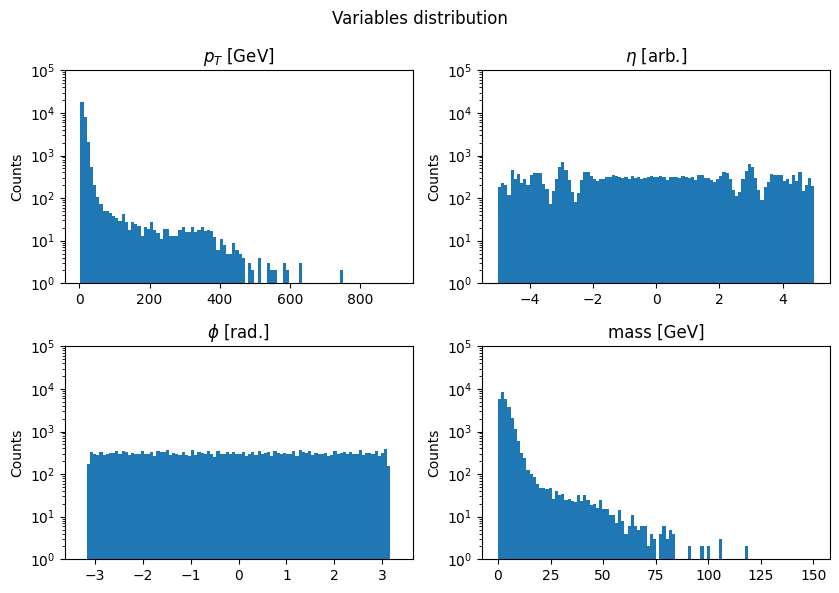

In [5]:
fig,axs = plt.subplots(2, 2,figsize=(8.5,6))
fig.suptitle("Variables distribution")
n_bins = 100

axs[0, 0].hist(x[:,0],bins=n_bins)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_title('{} [GeV]'.format(labels_map[0]))
axs[0, 0].set_label("Counts")
axs[0, 0].set_ylim(1,10e4)

axs[0, 1].hist(x[:,1],bins=n_bins, range=(-5,5))
axs[0, 1].set_title('{} [arb.]'.format(labels_map[1]))
axs[0, 1].set_ylim(1,10e4)

axs[1, 0].hist(x[:,2],bins=n_bins, range=(-3.30,3.30))
axs[1, 0].set_title('{} [rad.]'.format(labels_map[2]))
axs[1,0].sharey(axs[0,1])

axs[1, 1].hist(x[:,3],bins=n_bins)
axs[1, 1].set_title('{} [GeV]'.format(labels_map[3]))
axs[1,1].sharey(axs[0,0])

for ax in axs.flat:
    ax.set(ylabel='Counts',yscale='log')

fig.tight_layout()

plt.show()
!mkdir figures
fig.savefig('figures/Variables_distribution.pdf',dpi=190)

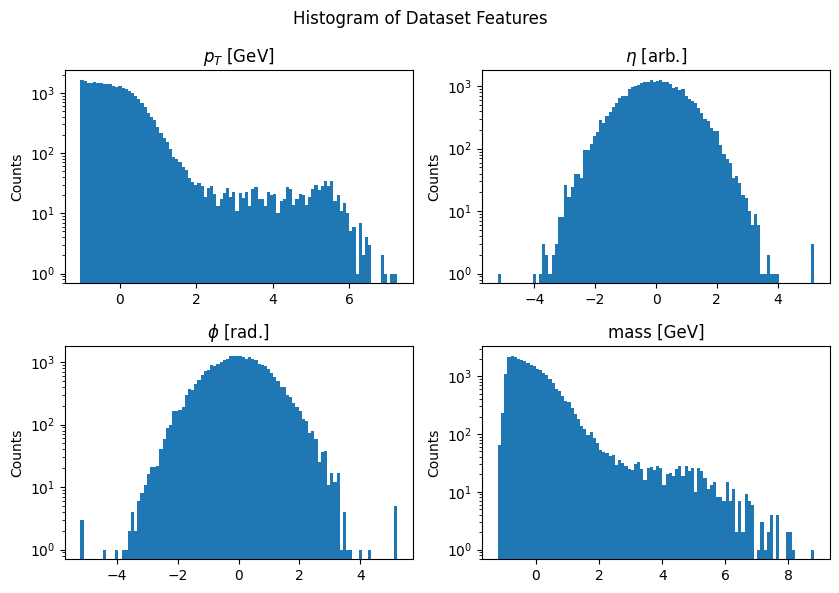

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 6))
fig.suptitle("Histogram of Dataset Features")
n_bins = 100

axs[0, 0].hist(xtr[:, 0], bins=n_bins,log=True)
axs[0, 0].set_title('{} [GeV]'.format(labels_map[0]))
axs[0, 0].set_ylabel("Counts")

axs[0, 1].hist(xtr[:, 1], bins=n_bins,log=True)
axs[0, 1].set_title('{} [arb.]'.format(labels_map[1]))
axs[0, 1].set_ylabel("Counts")

axs[1, 0].hist(xtr[:, 2], bins=n_bins,log=True)
axs[1, 0].set_title('{} [rad.]'.format(labels_map[2]))
axs[1, 0].set_ylabel("Counts")

axs[1, 1].hist(xtr[:, 3], bins=n_bins,log=True)
axs[1, 1].set_title('{} [GeV]'.format(labels_map[3]))
axs[1, 1].set_ylabel("Counts")

plt.tight_layout()
plt.show()

fig.savefig('figures/Variables_distribution_transformed.pdf',dpi=190)
#mettere unità di misura


In [9]:
flow, optimizer = model_definer(num_features=num_features, num_iterations=6, hidden_features=128)

Numero di parametri allenabili = 406320


50 tensor(3.2191, device='cuda:0', grad_fn=<NegBackward0>)
100 tensor(3.0899, device='cuda:0', grad_fn=<NegBackward0>)
150 tensor(3.0263, device='cuda:0', grad_fn=<NegBackward0>)
200 tensor(2.9926, device='cuda:0', grad_fn=<NegBackward0>)
250 tensor(2.9466, device='cuda:0', grad_fn=<NegBackward0>)
300 tensor(2.9135, device='cuda:0', grad_fn=<NegBackward0>)
350 tensor(2.9003, device='cuda:0', grad_fn=<NegBackward0>)
400 tensor(2.8602, device='cuda:0', grad_fn=<NegBackward0>)
450 tensor(2.8404, device='cuda:0', grad_fn=<NegBackward0>)
500 tensor(2.8632, device='cuda:0', grad_fn=<NegBackward0>)
550 tensor(2.8005, device='cuda:0', grad_fn=<NegBackward0>)
600 tensor(2.7839, device='cuda:0', grad_fn=<NegBackward0>)
650 tensor(2.7750, device='cuda:0', grad_fn=<NegBackward0>)
700 tensor(2.7712, device='cuda:0', grad_fn=<NegBackward0>)
750 tensor(2.7987, device='cuda:0', grad_fn=<NegBackward0>)
800 tensor(2.7755, device='cuda:0', grad_fn=<NegBackward0>)
850 tensor(2.7857, device='cuda:0', grad_

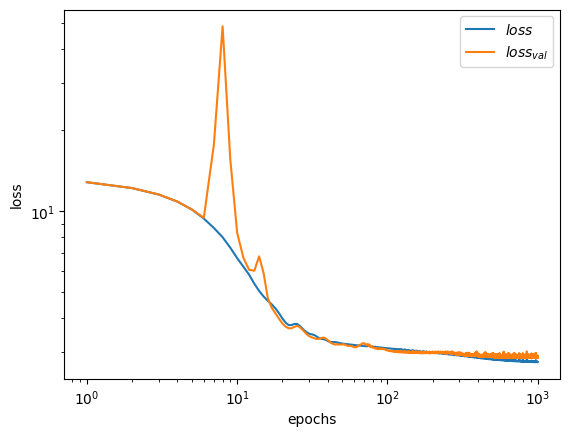

In [10]:
epochs = 1000 #andrà messo a 10000 su colab

figloss=plt.figure()
loss_values = []
loss_validation = []
for i in range(epochs):
  optimizer.zero_grad()
  loss = -flow.log_prob(inputs=xt).mean()
  loss_val = -flow.log_prob(inputs=xval).mean()
  loss.backward()
  optimizer.step()
  loss_values.append(loss.cpu().detach().numpy())
  loss_validation.append(loss_val.cpu().detach().numpy())
  if (i+1) % 50 == 0:
    print(i+1,loss)

plt.plot(range(1, epochs+1), loss_values, label='$loss$')
plt.plot(range(1, epochs+1), loss_validation,label='$loss_{val}$')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
figloss.savefig('figures/Loss_comparison.pdf',dpi=190)

In [13]:
sample = flow.sample(int(len(x)))
sample = sample.cpu().detach().numpy()
sample = x_preprocessor.backward(sample)

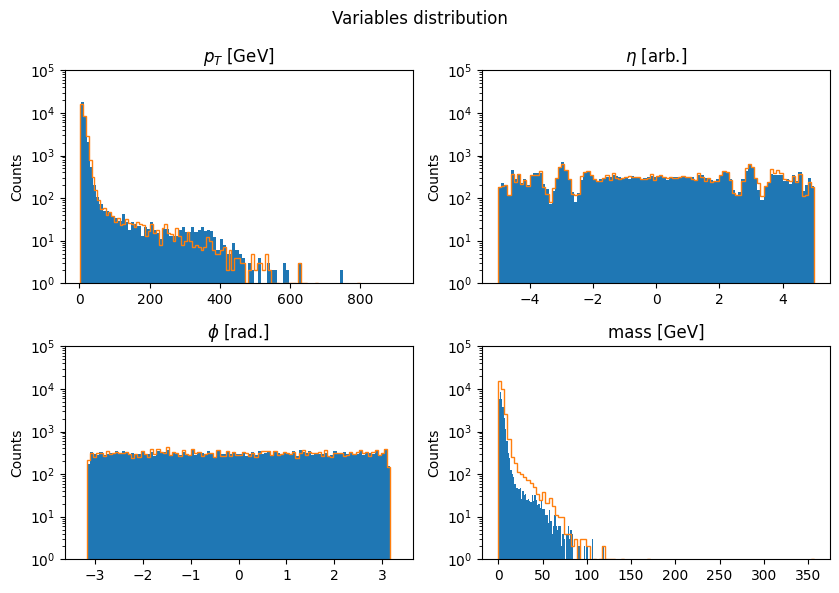

In [14]:
fig,axs = plt.subplots(2, 2,figsize=(8.5,6))
fig.suptitle("Variables distribution")
n_bins = 100

axs[0, 0].hist(x[:,0],bins=n_bins)
axs[0, 0].hist(sample[:,0],bins=n_bins,histtype='step')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_title('{} [GeV]'.format(labels_map[0]))
axs[0, 0].set_label("Counts")
axs[0, 0].set_ylim(1,10e4)

axs[0, 1].hist(x[:,1],bins=n_bins, range=(-5,5))
axs[0, 1].hist(sample[:,1],bins=n_bins, range=(-5,5),histtype='step')
axs[0, 1].set_title('{} [arb.]'.format(labels_map[1]))
axs[0, 1].set_ylim(1,10e4)

axs[1, 0].hist(x[:,2],bins=n_bins, range=(-3.30,3.30))
axs[1, 0].hist(sample[:,2],bins=n_bins, range=(-3.30,3.30),histtype='step')
axs[1, 0].set_title('{} [rad.]'.format(labels_map[2]))
axs[1,0].sharey(axs[0,1])

axs[1, 1].hist(x[:,3],bins=n_bins)
axs[1, 1].hist(sample[:,3],bins=n_bins,histtype='step')
axs[1, 1].set_title('{} [GeV]'.format(labels_map[3]))
axs[1,1].sharey(axs[0,0])

for ax in axs.flat:
    ax.set(ylabel='Counts',yscale='log')

fig.tight_layout()

plt.show()
fig.savefig('figures/Variables_distribution_with_reconstruction.pdf',dpi=190)

In [11]:
#training
# gaus = flow(data)
# unif = erf(gaus)
# unif' = unif * 2**N
# unif'' = int(unif')
# comp = unif''/2**N
# gaus' = erfinv(comp)
# data' = flow^-1(gaus') ==? data

In [34]:
###COMPRESSING###

x_compressor = Compressor(flow=flow, N=11, limit=3)
x_compressed = x_compressor.compress(xt)

x_decompressed = x_compressor.decompress(x_compressed)

x_decompressed = x_preprocessor.backward(x_decompressed)


AttributeError: module 'utils.our_classes' has no attribute 'Compressor'

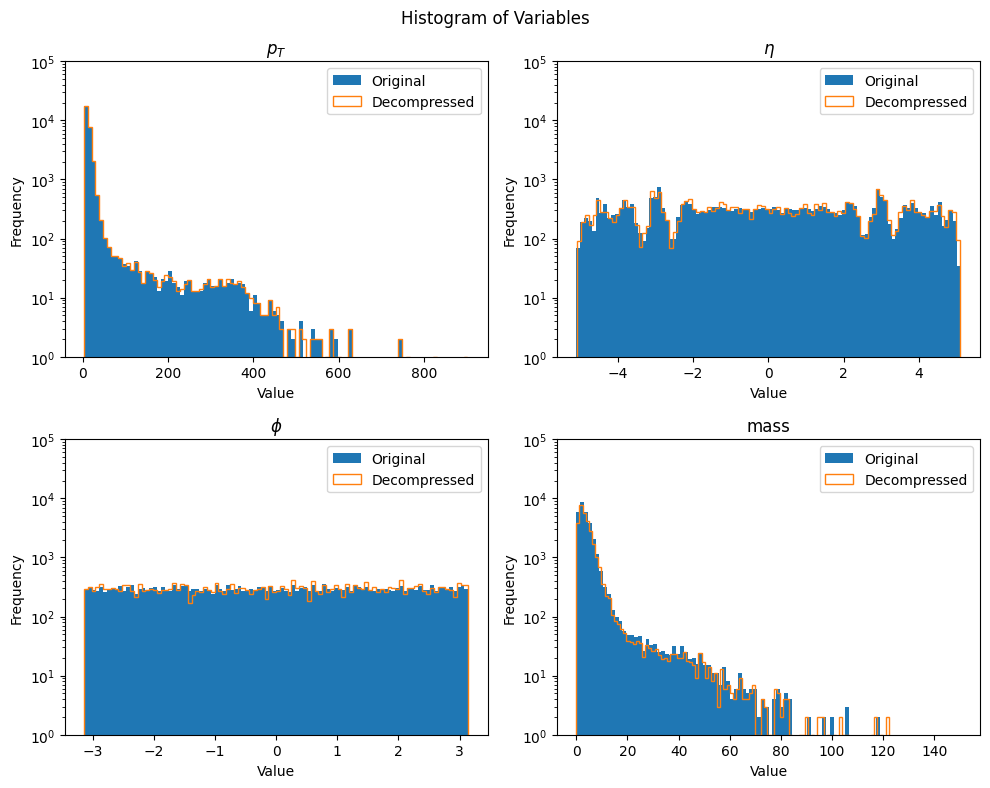

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Histogram of Variables")

n_bins = 100

axs[0, 0].hist(x[:, 0], bins=n_bins, label='Original',  log=True)
axs[0, 0].hist(xcomp[:, 0], bins=n_bins, label='Decompressed',histtype='step')
axs[0, 0].set_title(labels_map[0])
axs[0, 0].set_xlabel("Value")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_ylim(1,10e4)
axs[0, 0].legend()

axs[0, 1].hist(x[:, 1], bins=n_bins, label='Original', log=True)
axs[0, 1].hist(xcomp[:, 1], bins=n_bins, label='Decompressed',histtype='step')
axs[0, 1].set_title(labels_map[1])
axs[0, 1].set_xlabel("Value")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_ylim(1,10e4)
axs[0, 1].legend()

axs[1, 0].hist(x[:, 2], bins=n_bins, label='Original', log=True)
axs[1, 0].hist(xcomp[:, 2], bins=n_bins, label='Decompressed',histtype='step')
axs[1, 0].set_title(labels_map[2])
axs[1, 0].set_xlabel("Value")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].legend()
axs[1,0].sharey(axs[0,1])

axs[1, 1].hist(x[:, 3], bins=n_bins, label='Original', log=True)
axs[1, 1].hist(xcomp[:, 3], bins=n_bins, label='Decompressed', histtype='step')
axs[1, 1].set_title(labels_map[3])
axs[1, 1].set_xlabel("Value")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].legend()
axs[1,1].sharey(axs[0,0])

plt.tight_layout()
plt.show()
fig.savefig('figures/Variables_comparison.pdf', dpi=190)


<ipython-input-51-b446a6a958ce>:22: RuntimeWarning: invalid value encountered in divide
  axs[1, i].scatter(bins[:-1],ns/ns1)
<ipython-input-51-b446a6a958ce>:22: RuntimeWarning: divide by zero encountered in divide
  axs[1, i].scatter(bins[:-1],ns/ns1)


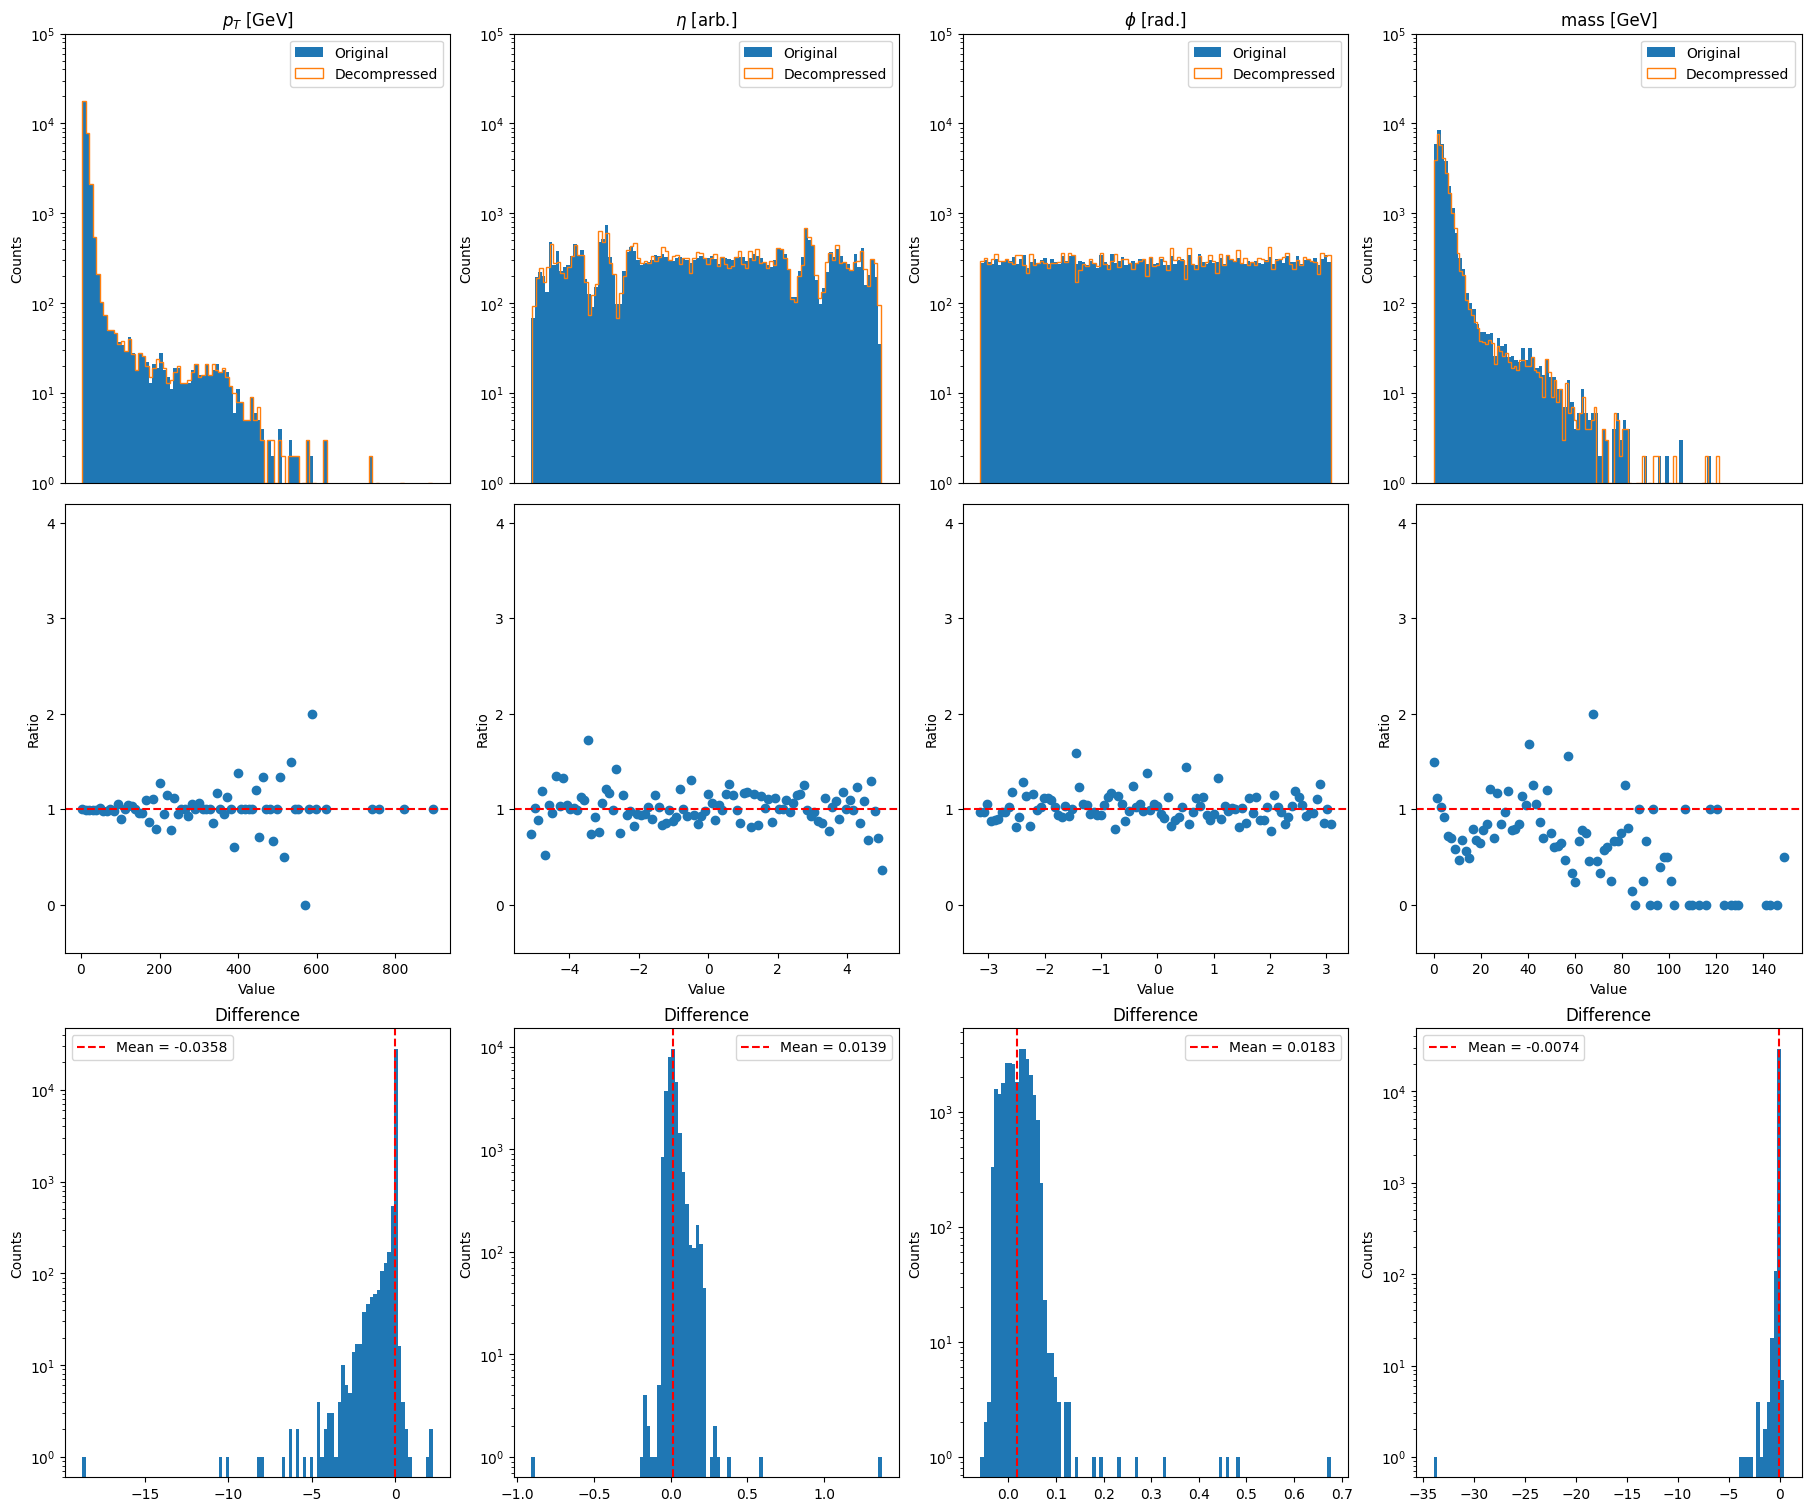

In [51]:
difference = xcomp-x

fig_diff, axs = plt.subplots(3, 4, figsize=(18, 15), layout='constrained')
fig.suptitle("Histogram and Ratio Plots")

n_bins = 100

for i in range(4):
    y = []
    y.append(x[:, i])
    y.append(xcomp[:, i])

    ns, bins, patches = axs[0, i].hist(y[0], bins=n_bins, label='Original', log=True)
    ns1,bins1,patches1 = axs[0, i].hist(y[1], bins=n_bins, label='Decompressed', histtype='step')
    axs[0, i].set_title('{} [{}]'.format(labels_map[i],unit_measure[i]))
    axs[0, i].set_ylabel("Counts")
    axs[0, i].legend()
    axs[0, i].set_ylim(1,10e4)
    axs[0, i].get_xaxis().set_ticks([])


    axs[1, i].scatter(bins[:-1],ns/ns1)
    axs[1, i].axhline(y=1, color='r', linestyle='--')
    axs[1, i].set_xlabel("Value")
    axs[1, i].set_ylabel("Ratio")
    axs[1, i].set_ylim(-0.5,4.2)


    axs[2, i].hist(difference[:, i],bins = n_bins,log=True)
    axs[2, i].set_title("Difference")
    axs[2, i].set_ylabel("Counts")
    axs[2, i].axvline(x=np.mean(difference[:, i]), color='r', linestyle='--',label='Mean = {:.4f}'.format(np.mean(difference[:, i])))
    axs[2, i].legend()

plt.show()
fig_diff.savefig('figures/difference.pdf', dpi=190)

In [52]:
with open('input.txt', 'w') as input:
    for i in range(len(x)):
        input.write(' '.join(str(x[i, j]) for j in range(x.shape[1])) + "\n")

with open('output.txt', 'w') as output:
    for i in range(len(x)):
        output.write(' '.join(str(xcomp[i, j]) for j in range(xcomp.shape[1])) + "\n")

with open('compressed.txt', 'w') as compressed:
    for i in range(len(x)):
        compressed.write(' '.join(str(unif[i, j]) for j in range(unif.shape[1])) + "\n")


In [53]:
size_input = stat('input.txt').st_size
print('Size of input file =',size_input/(1024*1024),'MB')

size_output = stat('output.txt').st_size
print('Size of output file =',size_output/(1024*1024),'MB')

size_compressed = stat('compressed.txt').st_size
print('Size of compressed file =',size_compressed/(1024*1024),'MB')

print('Compression ratio =',size_input/size_compressed)

Size of input file = 1.6123056411743164 MB
Size of output file = 1.1352148056030273 MB
Size of compressed file = 0.5514593124389648 MB
Compression ratio = 2.9237073430558222


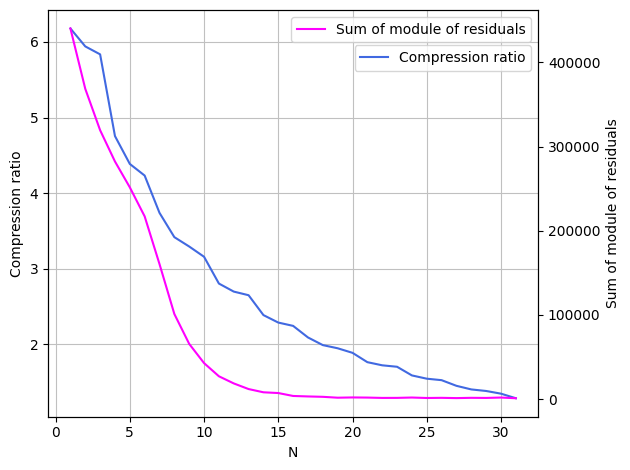

In [54]:
RR = []
residui = []


for k in range(1,32):

    N = k

    gaus_tensor = flow.transform_to_noise(xt)
    gaus = (gaus_tensor.cpu().detach().numpy())

    unif = scipy.special.erf(gaus)
    unif = unif * 2**N
    unif = unif.astype(int)
    comp = unif/2**(N)   #compression
    gaus_comp = scipy.special.erfinv(comp)
    gaus_comp = InfEraser.inf_eraser(gaus_comp)


    gaus_tensor_comp = torch.tensor(gaus_comp).to('cuda').float()
    x_tensor_comp, _ = flow._transform.inverse(gaus_tensor_comp)
    xcomp = x_tensor_comp.cpu().detach().numpy()

    xcomp = trasformation.prep(original=x, transformed=xcomp, dir='backward', index_log=([0,3]), range_quantile=r_q, n_quantiles=10000)

    with open('input.txt', 'w') as input:
        for i in range(len(x)):
            input.write(' '.join(str(x[i, j]) for j in range(x.shape[1])) + "\n")

    with open('output.txt', 'w') as output:
        for i in range(len(x)):
            output.write(' '.join(str(xcomp[i, j]) for j in range(xcomp.shape[1])) + "\n")

    with open('compressed.txt', 'w') as compressed:
        for i in range(len(x)):
            compressed.write(' '.join(str(unif[i, j]) for j in range(unif.shape[1])) + "\n")

    size_input = stat('input.txt').st_size
    size_output = stat('output.txt').st_size
    size_compressed = stat('compressed.txt').st_size

    r_k = size_input/size_compressed
    RR.append(r_k)

    residui_k = np.sum(np.abs(x-xcomp))
    residui.append(residui_k)


fig, ax1 = plt.subplots()
ax1.set_xlabel('N')
ax1.set_ylabel('Compression ratio')
ax1.plot(range(1,k+1),RR, c='royalblue',label='Compression ratio')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Sum of module of residuals')
ax2.plot(range(1,k+1),residui, c='fuchsia',label='Sum of module of residuals')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.93))
ax2.legend(loc=0)
ax1.grid(c='silver')
plt.show()

fig.savefig('figures/Compression_ratio.pdf',dpi=190)

In [62]:
###TESTING
N=11
xtest_trans = np.copy(xtest)
xtest_trans = trasformation.prep(original=xtest, transformed=xtest_trans, dir='forward', index_log=([0,3]), range_quantile=r_q, n_quantiles=10000)


xtest_tensor = torch.tensor(xtest_trans).to('cuda').float()

gaus_test_tensor = flow.transform_to_noise(xtest_tensor)
gaus_test = (gaus_test_tensor.cpu().detach().numpy())
unif_test = scipy.special.erf(gaus_test)
unif_test = unif_test * 2**N
comp_test = unif_test.astype(int)
comp_test_frac = unif/2**(N)
gaus_test_decomp = scipy.special.erfinv(comp_test_frac)
gaus_test_decomp = InfEraser.inf_eraser(gaus_test_decomp)
gaus_test_tensor_decomp = torch.tensor(gaus_test_decomp).to('cuda').float()
xtest_tensor_decomp, _ = flow._transform.inverse(gaus_test_tensor_decomp)
xtest_decomp = xtest_tensor_decomp.cpu().detach().numpy()

xtest_decomp = trasformation.prep(original=xtest, transformed=xtest_decomp, dir='backward', index_log=([0,3]), range_quantile=r_q, n_quantiles=10000)


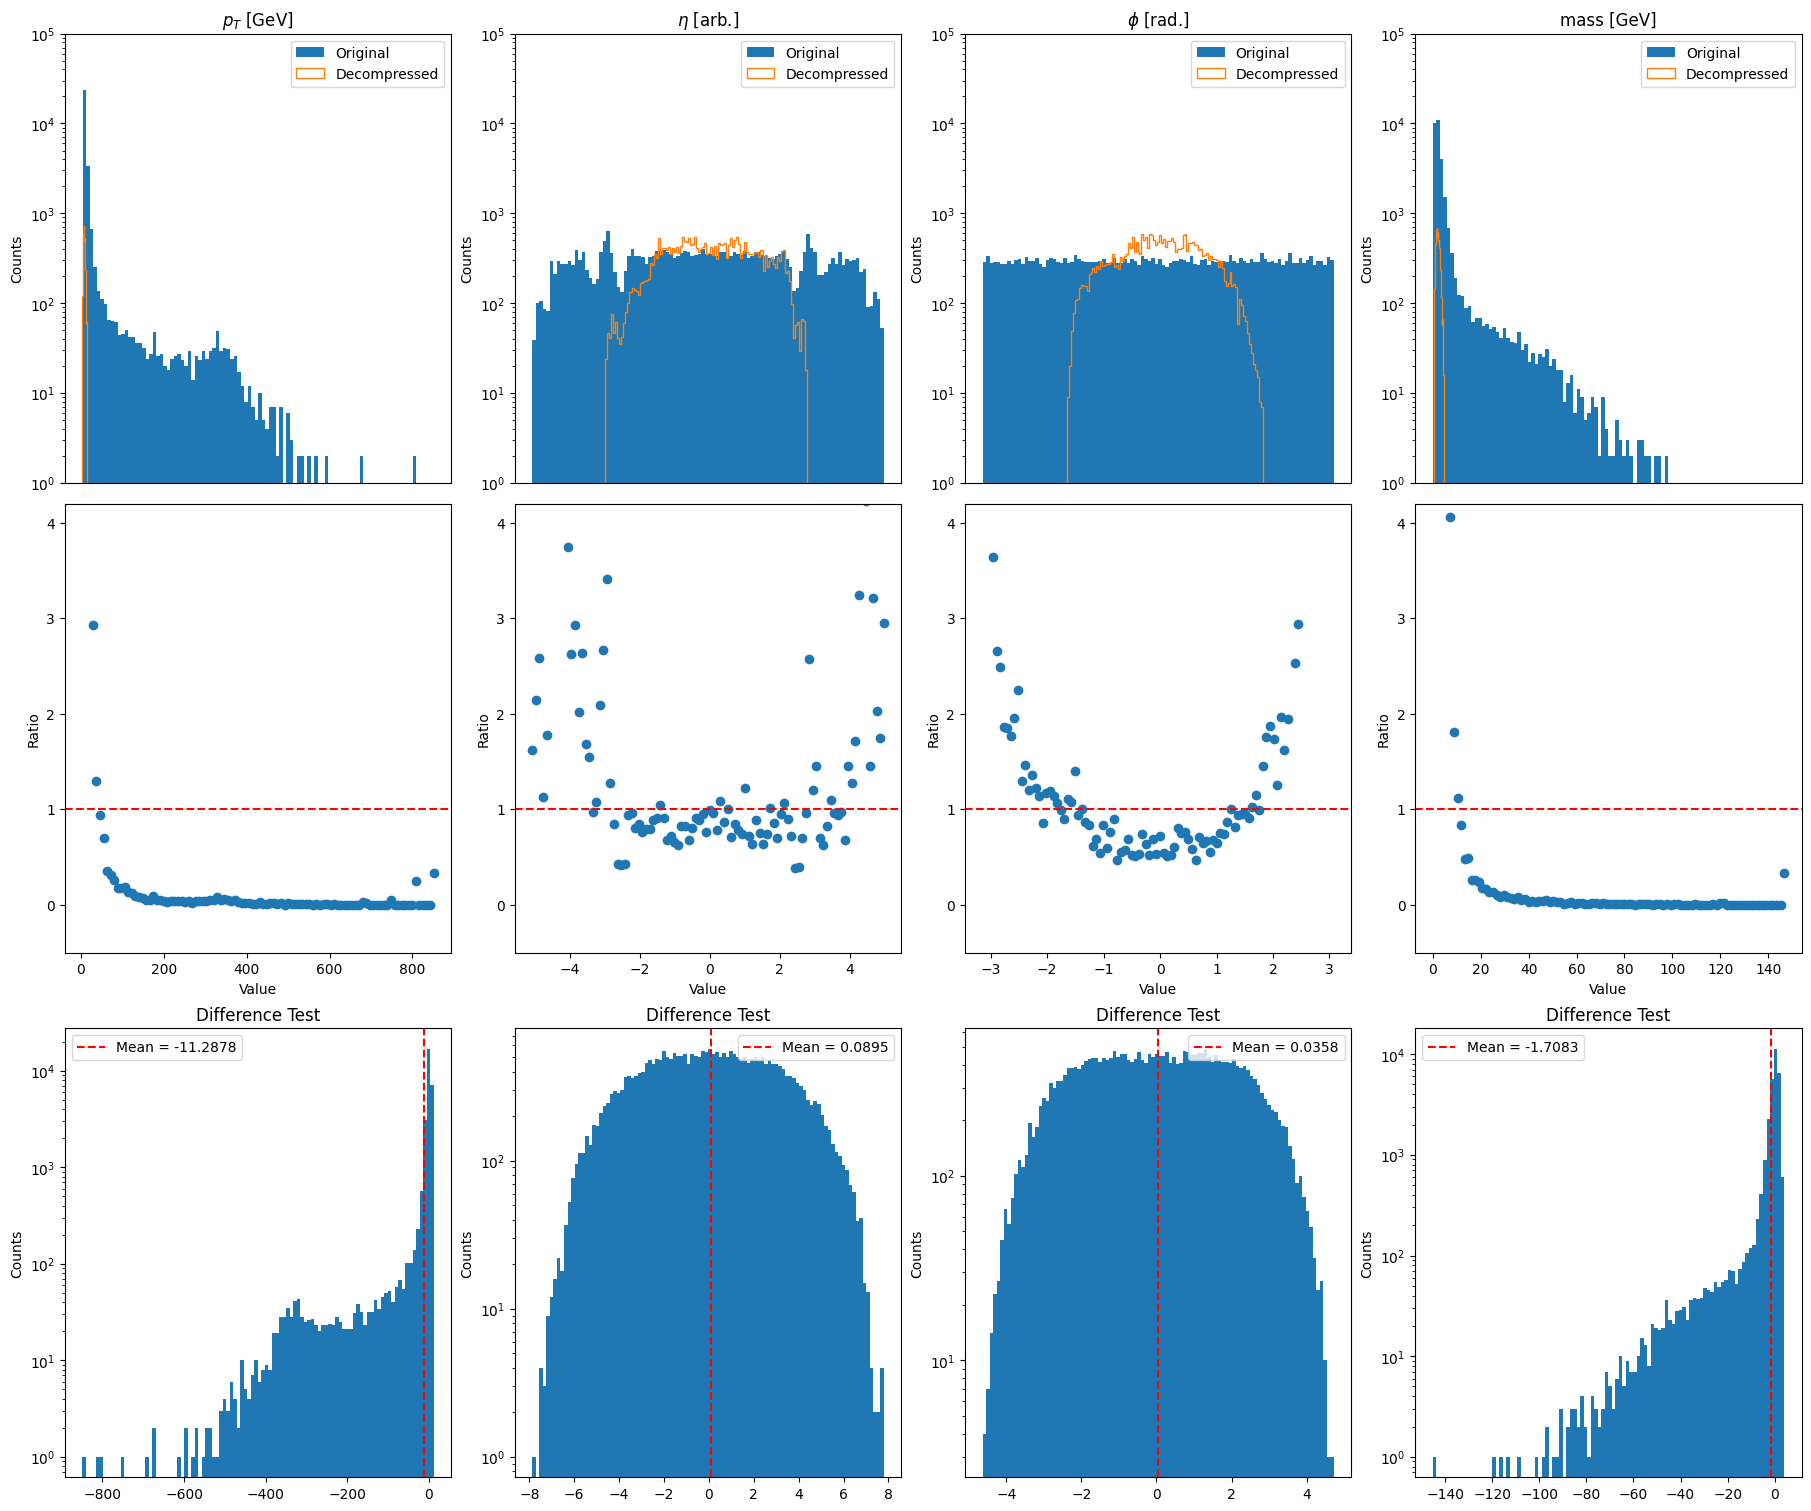

In [63]:
difference_test = xtest_decomp-xtest

fig_diff, axs = plt.subplots(3, 4, figsize=(18, 15), layout='constrained')
fig.suptitle("Histogram and Ratio Plots for Test")

n_bins = 100

for i in range(4):
    y = []
    y.append(xtest[:, i])
    y.append(xtest_decomp[:, i])

    ns, bins, patches = axs[0, i].hist(y[0], bins=n_bins, label='Original', log=True)
    ns1,bins1,patches1 = axs[0, i].hist(y[1], bins=n_bins, label='Decompressed', histtype='step')
    axs[0, i].set_title('{} [{}]'.format(labels_map[i],unit_measure[i]))
    axs[0, i].set_ylabel("Counts")
    axs[0, i].legend()
    axs[0, i].set_ylim(1,10e4)
    axs[0, i].get_xaxis().set_ticks([])


    axs[1, i].scatter(bins[:-1],ns/ns1)
    axs[1, i].axhline(y=1, color='r', linestyle='--')
    axs[1, i].set_xlabel("Value")
    axs[1, i].set_ylabel("Ratio")
    axs[1, i].set_ylim(-0.5,4.2)


    axs[2, i].hist(difference_test[:, i],bins = n_bins,log=True)
    axs[2, i].set_title("Difference Test")
    axs[2, i].set_ylabel("Counts")
    axs[2, i].axvline(x=np.mean(difference_test[:, i]), color='r', linestyle='--',label='Mean = {:.4f}'.format(np.mean(difference_test[:, i])))
    axs[2, i].legend()

plt.show()
fig_diff.savefig('figures/difference_test.pdf', dpi=190)